In [78]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import root_mean_squared_error

In [79]:
# Load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [80]:
# Define the features and target
X = df.drop('Glucose', axis=1).values
y = df['Glucose'].values

Making production from single variable

In [81]:
x_bmi = df['BMI'].values
print(y.shape, x_bmi.shape)

(768,) (768,)


However, the feature varible must be converted to 2D array to be recognize by sklearn

In [82]:
# Using reshape to convert to 2D array
x_bmi = x_bmi.reshape(-1, 1)
x_bmi.shape

(768, 1)

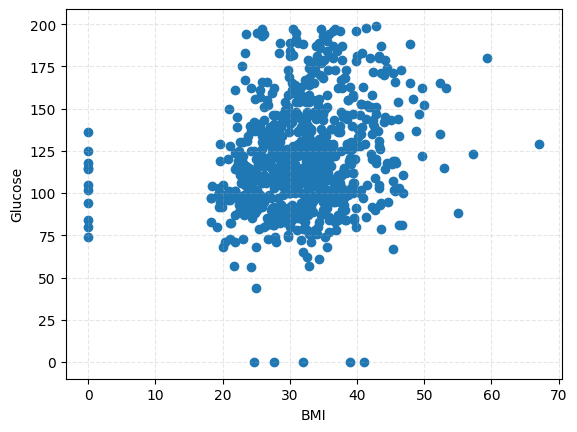

In [83]:
# plot the data
plt.scatter(x_bmi, y)
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

There is positive correlation between BMI and Glucose

In [84]:
# fit the model to linear regression
model = LinearRegression()
model.fit(x_bmi, y)

LinearRegression()

In [85]:
# Best
y_pred = model.predict(x_bmi)
print(y_pred[:5])

[122.33559947 116.06003628 113.10155649 117.40479982 130.85243523]


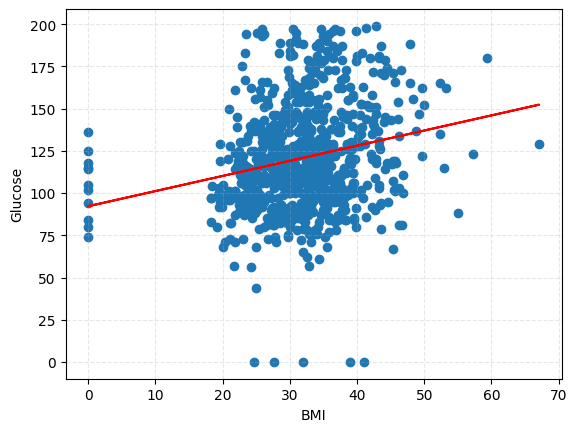

In [86]:
# Line of best fit
plt.scatter(x_bmi, y)
plt.plot(x_bmi, y_pred, color='red')
plt.xlabel('BMI')
plt.ylabel('Glucose')
plt.grid(alpha=0.3, linestyle='--')
plt.show()

The aim of linear regression is to minimize the sum of residuals by minimizing the cost function.

Linear Regression using the whole features

In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=42)

In [88]:
# Fit the model to linear regression
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_all.predict(X_test)

Quantifying Model

1. R_squared: It quantifies the variance in target values explained by the features

In [89]:
# Model performance
model_all.score(X_test, y_test)

0.28280468810375115

In [90]:
# Determine MSE and RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Root mean squared error: {rmse}")


Root mean squared error: 26.341459582232265


Average glucose error is 26mg/dL

Cross Validation

Model performance depends on the way the data was splitted, this might not necessarily be able to generalize the unseen data.

Cross validation split the data into number of folds and 1 fold serve as the *test set* while n-1 serves as the *training set*. The algorithm run making each fold a test set until the last fold.

In [91]:
# Cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

reg_cross_val = LinearRegression()
cv_results = cross_val_score(reg_cross_val, X, y, cv=kf)
print(cv_results)

[0.2997417  0.34128881 0.28727347 0.4048787  0.2928897 ]


In [92]:
# mean
print(f"Mean cross validation score: {cv_results.mean()}")

# standard deviation
print(f"Standard deviation of cross validation score: {cv_results.std()}")

# Quantile
print(f"Quantile 2.5% and 97.5%: {np.quantile(cv_results, [0.025,0.975])}")

Mean cross validation score: 0.3252144752752283
Standard deviation of cross validation score: 0.044131726153632866
Quantile 2.5% and 97.5%: [0.28783509 0.39851971]


Regularization of Regression

1. Ridge: Panalizes large positive and negative coefficients
2. Lasso: Select important features and shrink less important features to zero.

In [93]:
# Ridge Regression
scores = []
for alpha in [0.01, 0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    scores.append(ridge.score(X_test, y_test))
scores

[0.2828089039524213,
 0.28284666232222233,
 0.28320633574804766,
 0.2853000732200003,
 0.26423984812668155,
 0.19292424694100963]

performance get worse with the increase in alpha value.

In [94]:
# Lasso Regression
scores = []
for alpha in [0.01, 0.1, 1, 10, 100, 1000]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    scores.append(lasso.score(X_test, y_test))
scores

[0.2831114455475573,
 0.28575325694826237,
 0.29795609755827845,
 0.17989838789273893,
 0.10438614467572016,
 0.04044144424693341]

Index(['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
[-0.44744635  0.11662917 -0.28627271  0.0906138   0.31619679  0.81490392
  0.48641529 24.60117613]


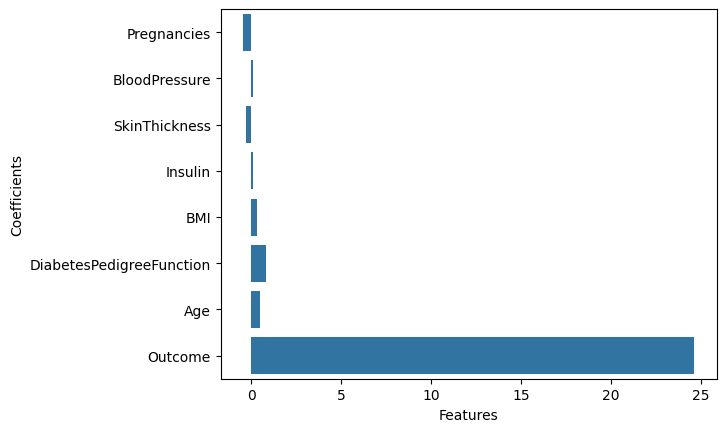

In [95]:
# Lass model
names = df.drop('Glucose', axis=1).columns
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print(names)
print(lasso.coef_)

# plot the coefficients
sns.barplot(x= lasso.coef_, y= names)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.show()  

The most important predictor is the binary column (Outcome)